In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_curve,auc

In [216]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os

# Authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Correct dataset name
dataset_name = 'mahmudulhaqueshawon/sonar-data'  # Replace with actual dataset name

# Define the download path (use raw string for Windows path)
download_path = r"D:\ML_Projects\RockVsMine"

# Create the folder if it doesn’t exist
os.makedirs(download_path, exist_ok=True)

# Download and unzip the dataset
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

print(f"Dataset downloaded successfully to: {download_path}")

Dataset URL: https://www.kaggle.com/datasets/mahmudulhaqueshawon/sonar-data
Dataset downloaded successfully to: D:\ML_Projects\RockVsMine


In [217]:
df = pd.read_csv('D:\ML_Projects\RockVsMine\sonar data.csv',header=None)

In [218]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [219]:
df.shape

(208, 61)

In [220]:
df.isnull().sum().sum()

0

In [221]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [222]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [223]:
X = df.drop(60,axis=1)
Y = df[[60]]

In [225]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [226]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,stratify=Y)

In [227]:
print(X.shape,x_train.shape,x_test.shape)

(208, 60) (166, 60) (42, 60)


In [228]:
model = LogisticRegression()

In [229]:
model.fit(x_train,y_train)

c:\Users\chint\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [230]:
y_predict = model.predict(x_test)


In [231]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7619047619047619


In [232]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           M       0.70      0.95      0.81        22
           R       0.92      0.55      0.69        20

    accuracy                           0.76        42
   macro avg       0.81      0.75      0.75        42
weighted avg       0.80      0.76      0.75        42



In [233]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Compute AUC directly using roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", roc_auc)


AUC: 0.8181818181818181


In [234]:
input=(0.0374,0.0586,0.0628,0.0534,0.0255,0.1422,0.2072,0.2734,0.3070,0.2597,0.3483,0.3999,0.4574,0.5950,0.7924,0.8272,0.8087,0.8977,0.9828,0.8982,0.8890,0.9367,0.9122,0.7936,0.6718,0.6318,0.4865,0.3388,0.4832,0.3822,0.3075,0.1267,0.0743,0.1510,0.1906,0.1817,0.1709,0.0946,0.2829,0.3006,0.1602,0.1483,0.2875,0.2047,0.1064,0.1395,0.1065,0.0527,0.0395,0.0183,0.0353,0.0118,0.0063,0.0237,0.0032,0.0087,0.0124,0.0113,0.0098,0.0126)
np_input=np.asarray(input)
input_reshape=np_input.reshape(1,-1)


prediction=model.predict_proba(input_reshape)
prediction1=model.predict(input_reshape)

print(prediction)
print(prediction1)

[[0.66293144 0.33706856]]
['M']


[[21  1]
 [ 9 11]]


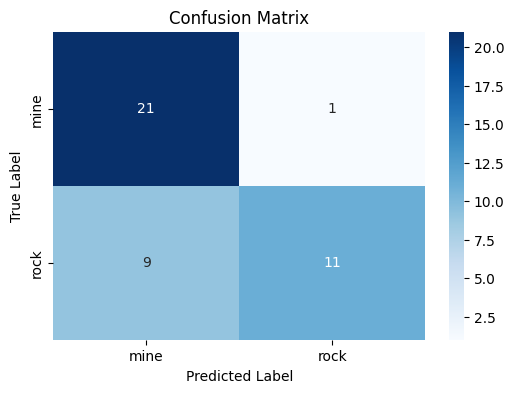

Classification Report:
               precision    recall  f1-score   support

           M       0.70      0.95      0.81        22
           R       0.92      0.55      0.69        20

    accuracy                           0.76        42
   macro avg       0.81      0.75      0.75        42
weighted avg       0.80      0.76      0.75        42



In [235]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["mine", "rock"], yticklabels=["mine", "rock"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for more details
print("Classification Report:\n", classification_report(y_test, y_predict))